In [1]:
cd c:\Users\seand\OneDrive\Dokumente\Masterthesis\CL_PDE_Solv

c:\Users\seand\OneDrive\Dokumente\Masterthesis\CL_PDE_Solv


In [2]:
from Problems.oneDim_Problems.sintsin2tproblem import clustering, f, exact_sol, clustering_grid
from models_code.SubproblemNetworks.LocalDeepONet_oneDim import LocalDeepONet_oneDim
from models_code.lossfunc import *
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

from src.config import *

# Plots of Problem defining functions

<function matplotlib.pyplot.show(close=None, block=None)>

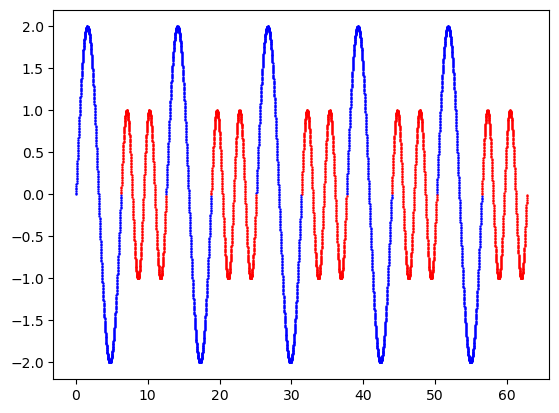

In [3]:
#plot f in [0,20 pi]
grid_x = torch.arange(0,20* np.pi,0.01)
out_f = np.array([f(t).numpy() for t in grid_x])
clusterlabel = clustering_grid(grid_x)[:,0]
plt.scatter(grid_x.numpy()[clusterlabel == 0] , out_f[clusterlabel == 0], color = 'blue', s = 0.5)
plt.scatter(grid_x.numpy()[clusterlabel == 1] , out_f[clusterlabel == 1], color = 'red', s = 0.5)
#plt.plot(grid_x.numpy() , out_f)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

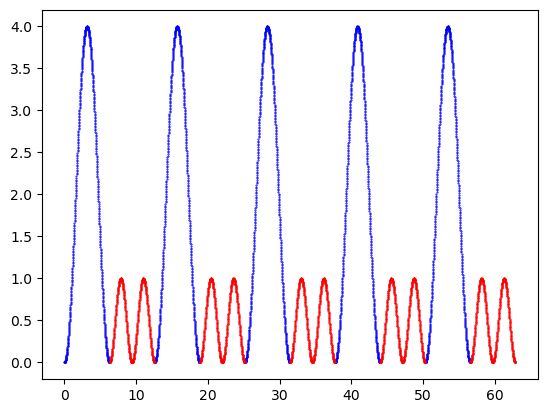

In [4]:
#plot exact solution in [0,20 pi]
grid_x = torch.arange(0,20* np.pi,0.01)
out_exact_sol = np.array([exact_sol(t).numpy() for t in grid_x])
clusterlabel = clustering_grid(grid_x)[:,0]
plt.scatter(grid_x.numpy()[clusterlabel == 0] , out_exact_sol[clusterlabel == 0], color = 'blue', s = 0.2)
plt.scatter(grid_x.numpy()[clusterlabel == 1] , out_exact_sol[clusterlabel == 1], color = 'red', s = 0.2)
plt.show

# Training Loops Local Solutions

### Domain A

In [3]:
#load local model A
sol_cluster_A = torch.load(Path(trained_models_address , 'local_A0.pt'))
sol_cluster_A.eval()

LocalDeepONet_oneDim(
  (in_trunk): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Tanh()
  )
  (hid_trunk): Sequential(
    (0): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (1): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (2): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (3): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (4): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (5): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (6): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (7): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tan

In [ ]:
#define Trainingset on A:
num_train_boundary = 15
t_grid = torch.linspace(0.,2*torch.pi,4000,requires_grad = True).view(-1,1).to('cuda')
boundary_t = torch.tensor(0., requires_grad = True).view(-1,1).to('cuda')
boundary_values = torch.linspace(-1.5,1.5,num_train_boundary, requires_grad = True).to('cuda')
#output on grid:
f_out = torch.zeros(t_grid.shape[0]).to('cuda')
for i in range(t_grid.shape[0]):
  f_out[i] = f(t_grid[i])

#model:
#






sol_cluster_A = LocalDeepONet_oneDim(1, 20, 10)
sol_cluster_A = sol_cluster_A.to('cuda')
alpha = 1e-3
beta = 0#1e-2
optimizer = torch.optim.Adam(sol_cluster_A.parameters(), lr = 1e-3)


for i in range(2000):
  optimizer.zero_grad()
  boundary_value_epoch = torch.full( t_grid.shape , boundary_values[i%num_train_boundary].item() , requires_grad = True).to('cuda')

  loss = D_loc(sol_cluster_A , boundary_t, boundary_value_epoch  , t_grid, f_out , alpha, beta )

  print(loss.item())
  loss.backward(retain_graph=True)
  optimizer.step()



<function matplotlib.pyplot.show(close=None, block=None)>

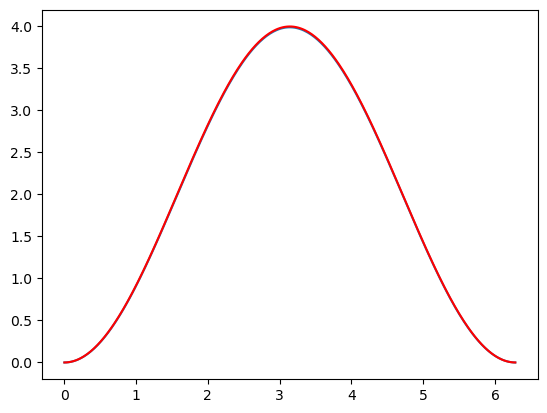

In [51]:
t_grid_A_test = torch.linspace(0.,2*torch.pi,400).view(-1,1)
sol_cluster_A.to('cpu')
boundary_test = 0.
sol = sol_cluster_A(t_grid_A_test,torch.full( t_grid_A_test.shape , boundary_test) )
plt.plot(t_grid_A_test.detach().numpy() , sol.detach().numpy())
plt.plot(t_grid_A_test, -2* np.cos(t_grid_A_test) + boundary_test+2, color = 'red')
plt.show

In [10]:
#save local model A
torch.save(sol_cluster_A, Path(trained_models_address , 'local_A0.pt'))

### Domain B

In [4]:
#load local model B
sol_cluster_B = torch.load(Path(trained_models_address , 'local_B0.pt'))
sol_cluster_B.eval()

LocalDeepONet_oneDim(
  (in_trunk): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Tanh()
  )
  (hid_trunk): Sequential(
    (0): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (1): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (2): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (3): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (4): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (5): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (6): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (7): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tan

In [ ]:
#define Trainingset on B:
t_grid = torch.linspace(2*torch.pi-0.1 ,4*torch.pi +0.1,2000,requires_grad = True).view(-1,1).to('cuda')
boundary_t = torch.tensor(2*torch.pi, requires_grad = True).view(-1,1).to('cuda')
boundary_values = torch.linspace(-1,1,10, requires_grad = True).to('cuda')
#output on grid:
f_out = torch.zeros(t_grid.shape[0]).to('cuda')
for i in range(t_grid.shape[0]):
  f_out[i] = f(t_grid[i])

#model:
#sol_cluster_B = LocalDeepONet_oneDim(1, 20, 10)
sol_cluster_B.to('cuda')
alpha = 1e-3
beta = 0
optimizer = torch.optim.Adam(sol_cluster_B.parameters(), lr = 1e-3)
for i in range(2000):
  boundary_value_epoch = torch.full( t_grid.shape , boundary_values[i%10].item(), requires_grad = True).to('cuda')
  optimizer.zero_grad()
  loss = D_loc(sol_cluster_B , boundary_t, boundary_value_epoch  , t_grid, f_out , alpha, beta )
  print(f'loss: {loss.item()}')
  loss.backward(retain_graph=True)
  optimizer.step()

<function matplotlib.pyplot.show(close=None, block=None)>

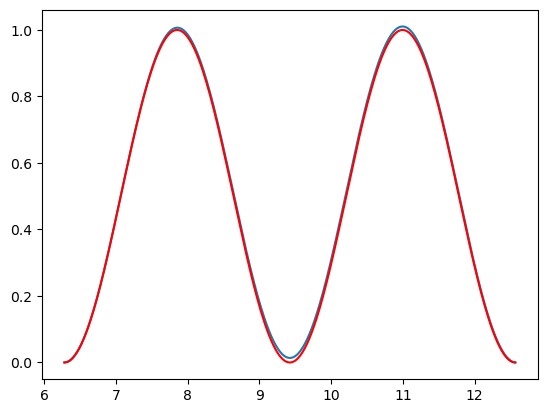

In [61]:
t_grid_B_test = torch.linspace(0.+2*torch.pi ,4*torch.pi,400).view(-1,1)
sol_cluster_B.to('cpu')
boundary_test = 0.

sol = sol_cluster_B(t_grid_B_test,torch.full( t_grid_B_test.shape , boundary_test) )
plt.plot(t_grid_B_test.detach().numpy() , sol.detach().numpy())
plt.plot(t_grid_B_test, (-0.5) * np.cos(2* t_grid_B_test)+0.5+ boundary_test , color = 'red')
plt.show

In [21]:
#save local model B
torch.save(sol_cluster_B, Path(trained_models_address , 'local_B0.pt'))

# Training Loops Global Models

In [5]:
from models_code.AssemblingNetworks.NaiveAssemblingNetwork import NaiveAssemblingNetwork
from models_code.AssemblingNetworks.AssemblingNetwork_non_t_dep import AssemblingNetwork_non_t_dep
from models_code.AssemblingNetworks.ResAssemblingNetwork import ResAssemblingNetwork

In [6]:
sol_cluster_A.to('cuda')
sol_cluster_B.to('cuda')
local_solutions = [sol_cluster_A, sol_cluster_B]

In [69]:
#define Trainingset for AssemblingNetwork:
N_grid = 10000
t_grid = torch.linspace(0. , 2*torch.pi,N_grid,requires_grad = True).view(-1,1)
clust_idx_boundary_t, t_rep_boundary = clustering(torch.tensor([0.]))
boundary_t = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_rep = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_clust = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_value = torch.zeros( (N_grid, 1) )
#output on grid:
f_out = torch.zeros(t_grid.shape[0])
for i in range(t_grid.shape[0]):
  f_out[i] = f(t_grid[i])


rep_grid = torch.rand( (N_grid , 1) )
clust_grid = torch.rand( (N_grid , 1) )


for i in range(N_grid):
  clust_idx, t_rep  = clustering(t_grid[i,0])
  clust_grid[i,0]  = torch.tensor(clust_idx)
  rep_grid[i,0] = torch.tensor(t_rep)

clust_grid.requires_grad = True
rep_grid.requires_grad = True

t_grid = t_grid.to('cuda')
boundary_t = boundary_t.to('cuda')
boundary_rep = boundary_rep.to('cuda')
boundary_clust = boundary_clust.to('cuda')
rep_grid = rep_grid.to('cuda')
clust_grid = clust_grid.to('cuda')
boundary_value = boundary_value.to('cuda')
f_out = f_out.to('cuda')

print(t_grid.shape)
print(boundary_t.shape)
print(boundary_rep.shape)
print(boundary_clust.shape)
print(rep_grid.shape)
print(clust_grid.shape)
print(boundary_value.shape)
print(f_out.shape)


C:\Users\seand\AppData\Local\Temp\ipykernel_15864\3276952215.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rep_grid[i,0] = torch.tensor(t_rep)


torch.Size([10000, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([10000, 1])
torch.Size([10000, 1])
torch.Size([10000, 1])
torch.Size([10000])


### Naive Assembling

In [ ]:
#load local model A
sol_cluster_A = torch.load(Path(trained_models_address , 'global_naive0.pt'))
sol_cluster_A.eval()

In [14]:
#boundaryNet model:
local_solutions[0].to('cuda')
local_solutions[1].to('cuda')

my_assemblingNetwork = NaiveAssemblingNetwork( 1,30,15 ).to('cuda')
alpha = 1e-3
beta = 1e-3
optimizer = torch.optim.Adam(my_assemblingNetwork.parameters(), lr = 1e-3)
for i in range(2000): #tqdm(range(1000)):
  optimizer.zero_grad()
  loss = D_glob(my_assemblingNetwork , local_solutions, boundary_t, boundary_rep, boundary_clust, t_grid, rep_grid, clust_grid , boundary_value , f_out,  alpha, beta )
  print(loss.item())
  loss.backward(retain_graph=True)
  optimizer.step()

0.0012511552777141333
0.0012499140575528145
0.0012501351302489638
0.0012504685437306762
0.0012503470061346889
0.0012500592274591327
0.0012498853029683232
0.0012499099830165505
0.001250038854777813
0.001250122208148241
0.0012500949669629335
0.0012499968288466334
0.0012499050935730338
0.0012498731957748532
0.001249902998097241
0.0012499559670686722
0.0012499867007136345
0.00124997494276613
0.001249933266080916
0.0012498912401497364
0.001249872730113566
0.001249882741831243
0.0012499070726335049
0.001249924534931779
0.0012499229051172733
0.0012499047443270683


KeyboardInterrupt: 

C:\Users\seand\AppData\Local\Temp\ipykernel_19092\1127036714.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rep_grid_test[i,0] = torch.tensor(t_rep_test)


<function matplotlib.pyplot.show(close=None, block=None)>

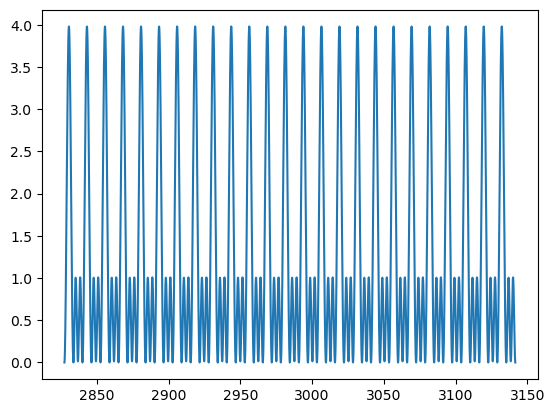

In [15]:
#plot
my_assemblingNetwork.to('cpu')
local_solutions[0].to('cpu')
local_solutions[1].to('cpu')

N_grid_test = 10000
t_grid_test = torch.linspace(900*torch.pi , 1000*torch.pi,N_grid_test,requires_grad = True).view(-1,1)
clust_idx_boundary_t, t_rep_boundary = clustering(torch.tensor([0.]))
boundary_t = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_rep = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_clust = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_value = torch.zeros( (N_grid_test, 1) )
#output on grid:
f_out = torch.zeros(t_grid_test.shape[0])
for i in range(t_grid_test.shape[0]):
  f_out[i] = f(t_grid_test[i])


rep_grid_test = torch.rand( (N_grid_test , 1) )
clust_grid_test = torch.rand( (N_grid_test , 1) )


for i in range(N_grid_test):
  clust_idx_test, t_rep_test  = clustering(t_grid_test[i,0])
  clust_grid_test[i,0]  = torch.tensor(clust_idx_test)
  rep_grid_test[i,0] = torch.tensor(t_rep_test)

out = my_assemblingNetwork(t_grid_test, rep_grid_test, clust_grid_test , local_solutions)
out = out.to('cpu').detach().numpy()
plt.plot(t_grid_test.detach().numpy() , out)
plt.show

In [75]:
#save local model B
torch.save(sol_cluster_B, Path(trained_models_address , 'global_naive0.pt'))

### Non time dependent Assembling

In [ ]:
#load local model A
sol_cluster_A = torch.load(Path(trained_models_address , 'global_non_t_dep0.pt'))
sol_cluster_A.eval()

In [ ]:
#boundaryNet model without clustertime dependence:
local_solutions[0].to('cuda')
local_solutions[1].to('cuda')

my_assemblingNetwork = AssemblingNetwork_non_t_dep( 1,30,15 ).to('cuda')
alpha = 1e-3
beta = 1e-3
optimizer = torch.optim.Adam(my_assemblingNetwork.parameters(), lr = 1e-3)
for i in range(2000):
  optimizer.zero_grad()
  loss = D_glob_non_t_dep(my_assemblingNetwork , local_solutions, boundary_rep, boundary_clust,  rep_grid, clust_grid , boundary_value , f_out,  alpha, beta )
  print(loss.item())
  loss.backward(retain_graph=True)
  optimizer.step()

C:\Users\seand\AppData\Local\Temp\ipykernel_17500\2797173196.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rep_grid_test[i,0] = torch.tensor(t_rep_test)


<function matplotlib.pyplot.show(close=None, block=None)>

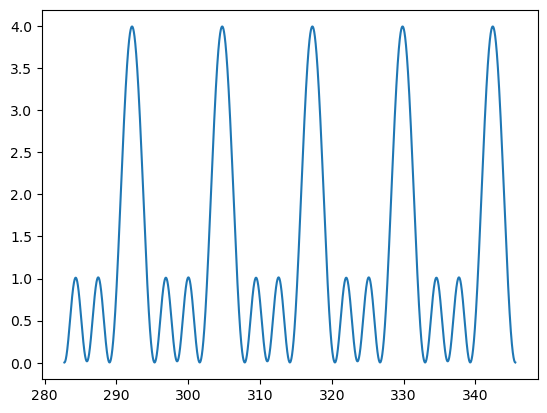

In [22]:
#plot

my_assemblingNetwork.to('cpu')
local_solutions[0].to('cpu')
local_solutions[1].to('cpu')

N_grid_test = 10000
t_grid_test = torch.linspace(90*torch.pi , 110*torch.pi,N_grid_test,requires_grad = True).view(-1,1)
clust_idx_boundary_t, t_rep_boundary = clustering(torch.tensor([0.]))
boundary_t = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_rep = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_clust = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_value = torch.zeros( (N_grid_test, 1) )
#output on grid:
f_out = torch.zeros(t_grid_test.shape[0])
for i in range(t_grid_test.shape[0]):
  f_out[i] = f(t_grid_test[i])


rep_grid_test = torch.rand( (N_grid_test , 1) )
clust_grid_test = torch.rand( (N_grid_test , 1) )


for i in range(N_grid_test):
  clust_idx_test, t_rep_test  = clustering(t_grid_test[i,0])
  clust_grid_test[i,0]  = torch.tensor(clust_idx_test)
  rep_grid_test[i,0] = torch.tensor(t_rep_test)

out = my_assemblingNetwork( rep_grid_test,clust_grid_test , local_solutions)[0].detach().numpy()

plt.plot(t_grid_test.detach().numpy() , out)
plt.show

In [23]:
#save local model B
torch.save(sol_cluster_B, Path(trained_models_address , 'global_non_t_dep0.pt'))

### ResNet Assembling

In [ ]:
#load local model A
sol_cluster_A = torch.load(Path(trained_models_address , 'global_resNet0.pt'))
sol_cluster_A.eval()

In [70]:
#ResAssembling model:
local_solutions[0].to('cuda')
local_solutions[1].to('cuda')

my_assemblingNetwork = ResAssemblingNetwork(1 ,10, 1,  10, 1)
my_assemblingNetwork.to('cuda')
alpha = 1e-3
beta = 1e-2
optimizer = torch.optim.Adam(my_assemblingNetwork.parameters(), lr = 1e-3)
for i in range(8000):
  optimizer.zero_grad()
  loss = D_glob(my_assemblingNetwork , local_solutions, boundary_t, boundary_rep, boundary_clust, t_grid, rep_grid, clust_grid , boundary_value , f_out,  alpha, beta )
  print(loss.item())
  loss.backward(retain_graph=True)
  optimizer.step()

0.007328905165195465
0.007121925242245197
0.006916819605976343
0.006713470909744501
0.006511799991130829
0.006311730481684208
0.006113290786743164
0.005916607566177845
0.0057218363508582115
0.0055291554890573025
0.005338754039257765
0.005150823853909969
0.004965575411915779
0.00478321872651577
0.004603973124176264
0.004428063053637743
0.0042557199485599995
0.004087184555828571
0.003922712057828903
0.003762568812817335
0.0036070370115339756
0.0034564100205898285
0.0033110002987086773
0.0031711349729448557
0.0030371593311429024
0.0029094316996634007
0.0027883206494152546
0.002674198243767023
0.0025674349162727594
0.0024683866649866104
0.0023773913271725178
0.002294747158885002
0.0022207037545740604
0.002155444584786892
0.002099065575748682
0.0020515592768788338
0.0020127911120653152
0.001982481451705098
0.0019601888488978148
0.0019452990964055061
0.0019370235968381166
0.001934409374371171
0.0019363649189472198
0.0019417045405134559
0.0019492068095132709
0.0019576880149543285
0.0019660731

KeyboardInterrupt: 

C:\Users\seand\AppData\Local\Temp\ipykernel_15864\2516370668.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rep_grid_test[i,0] = torch.tensor(t_rep_test)


<function matplotlib.pyplot.show(close=None, block=None)>

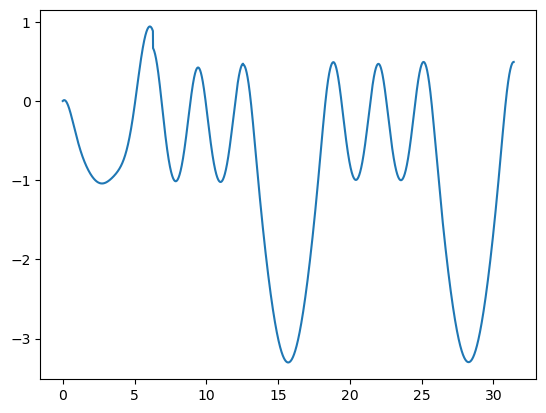

In [71]:
#plot

my_assemblingNetwork.to('cpu')
local_solutions[0].to('cpu')
local_solutions[1].to('cpu')

N_grid_test = 10000
t_grid_test = torch.linspace(0*torch.pi , 10*torch.pi,N_grid_test,requires_grad = True).view(-1,1)
clust_idx_boundary_t, t_rep_boundary = clustering(torch.tensor([0.]))
boundary_t = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_rep = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_clust = torch.tensor(  0., requires_grad = True).view(-1,1)
boundary_value = torch.zeros( (N_grid_test, 1) )
#output on grid:
f_out = torch.zeros(t_grid_test.shape[0])
for i in range(t_grid_test.shape[0]):
  f_out[i] = f(t_grid_test[i])


rep_grid_test = torch.rand( (N_grid_test , 1) )
clust_grid_test = torch.rand( (N_grid_test , 1) )


for i in range(N_grid_test):
  clust_idx_test, t_rep_test  = clustering(t_grid_test[i,0])
  clust_grid_test[i,0]  = torch.tensor(clust_idx_test)
  rep_grid_test[i,0] = torch.tensor(t_rep_test)

out = my_assemblingNetwork(t_grid_test, rep_grid_test, clust_grid_test , local_solutions)
out = out.to('cpu').detach().numpy()
plt.plot(t_grid_test.detach().numpy() , out)
#plt.plot(t_grid_test.detach().numpy(), np.sin(t_grid_test.detach().numpy()))
plt.show

In [ ]:
#save local model B
torch.save(sol_cluster_B, Path(trained_models_address , 'global_resNet0.pt'))